In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [3]:
df_raw = pd.read_csv("rawdata/유방암.csv")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 전처리 실시 

지난 번 과제와 동일한 데이터 세트를 사용한다. 지난 번 과제 정보 (결측치 없음, 범주형 변수 없음) 를 바탕으로 전처리를 실시한다. 

In [4]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 42)
print("Train data size\t: {}".format(df_train.shape))
print("Test data size\t: {}".format(df_test.shape))

df_train_x = df_train.drop(["diagnosis"], axis = 1)
df_train_y = df_train[["diagnosis"]]
df_test_x = df_test.drop(["diagnosis"], axis = 1)
df_test_y = df_test[["diagnosis"]]

Train data size	: (398, 31)
Test data size	: (171, 31)


In [6]:
knn_uncustomized = KNN()
knn_uncustomized.fit(df_train_x, df_train_y.values.ravel())

print("Accuracy on training set: {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

# 과대적합

Accuracy on training set: 0.922
Accuracy on test set: 0.959


In [7]:
knn_uncustomized

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range (1, 16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNN(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y.values.ravel())
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy

df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.936
1,2,0.935,0.942
2,3,0.947,0.942
3,4,0.927,0.953
4,5,0.922,0.959
5,6,0.920,0.953
6,7,0.935,0.965
7,8,0.917,0.965
8,9,0.922,0.971
9,10,0.920,0.959


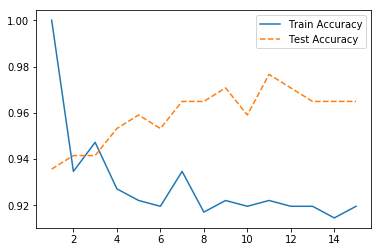

In [10]:
plt.plot(para_n_neighbors, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.legend()

In [18]:
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range (1, 11)] * 2

para_weight = (["uniform"]) * 10 + ["distance"] * 10

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weight):
    knn = KNN(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y.values.ravel())
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_weight = pd.DataFrame()
df_accuracy_weight["Neighbors"] = para_n_neighbors
df_accuracy_weight["Weights"] = para_weight
df_accuracy_weight["TrainAccuracy"] = train_accuracy
df_accuracy_weight["TestAccuracy"] = test_accuracy

df_accuracy_weight.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.936
1,2,uniform,0.935,0.942
2,3,uniform,0.947,0.942
3,4,uniform,0.927,0.953
4,5,uniform,0.922,0.959
5,6,uniform,0.920,0.953
6,7,uniform,0.935,0.965
7,8,uniform,0.917,0.965
8,9,uniform,0.922,0.971
9,10,uniform,0.920,0.959


In [23]:
df_accuracy_weights_pivot = df_accuracy_weight.pivot(index = "Neighbors", columns = "Weights", 
                                                     values = ["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.935673  0.935673
2                   1.0  0.934673     0.935673  0.941520
3                   1.0  0.947236     0.947368  0.941520
4                   1.0  0.927136     0.941520  0.953216
5                   1.0  0.922111     0.953216  0.959064
6                   1.0  0.919598     0.947368  0.953216
7                   1.0  0.934673     0.959064  0.964912
8                   1.0  0.917085     0.959064  0.964912
9                   1.0  0.922111     0.964912  0.970760
10                  1.0  0.919598     0.964912  0.959064

In [24]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + '_' + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.935673,0.935673
2,1.0,0.934673,0.935673,0.941520
3,1.0,0.947236,0.947368,0.941520
4,1.0,0.927136,0.941520,0.953216
5,1.0,0.922111,0.953216,0.959064


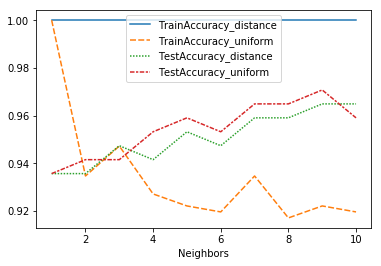

In [25]:
import seaborn as sns

sns.lineplot(data = df_accuracy_weights_pivot)

In [26]:
weights = "uniform"

In [28]:
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range (1, 11)] * 3

para_metric = (["minkowski"]) * 10 + ["euclidean"] * 10 + ["manhattan"] * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNN(nn)
    knn.fit(df_train_x, df_train_y.values.ravel())
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_weight = pd.DataFrame()
df_accuracy_weight["Neighbors"] = para_n_neighbors
df_accuracy_weight["Metric"] = para_metric
df_accuracy_weight["TrainAccuracy"] = train_accuracy
df_accuracy_weight["TestAccuracy"] = test_accuracy

df_accuracy_weight.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.936
1,2,minkowski,0.935,0.942
2,3,minkowski,0.947,0.942
3,4,minkowski,0.927,0.953
4,5,minkowski,0.922,0.959
5,6,minkowski,0.920,0.953
6,7,minkowski,0.935,0.965
7,8,minkowski,0.917,0.965
8,9,minkowski,0.922,0.971
9,10,minkowski,0.920,0.959


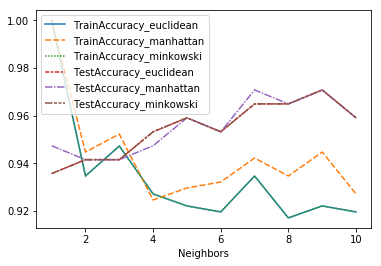

In [30]:
df_accuracy_weights_pivot = df_accuracy_weight.pivot(index = "Neighbors", columns = "Metric", 
                                                     values = ["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivot

level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + '_' + level1
df_accuracy_weights_pivot.head()

sns.lineplot(data = df_accuracy_weights_pivot)

### 결론 - 최종 모델 도출

In [40]:
knn_model = KNN(n_neighbors = 4, metric = "manhattan", weights = "uniform")
knn_model.fit(df_train_x, df_train_y.values.ravel())

print("Accuracy on")
print("Uncustomzed\t training: {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
print("Uncustomzed\t test\t : {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))
print("Tunned\t\t training: {:.3f}".format(knn_model.score(df_train_x, df_train_y)))
print("Tunned\t\t test\t : {:.3f}".format(knn_model.score(df_test_x, df_test_y)))

y_pred = knn_model.predict(df_test_x)

Accuracy on
Uncustomzed	 training: 0.922
Uncustomzed	 test	 : 0.959
Tunned		 training: 0.925
Tunned		 test	 : 0.947


In [35]:
print("Confusion Matrix:")
print(confusion_matrix(df_test_y, y_pred))

Confusion Matrix:
[[107   1]
 [  8  55]]
